In [15]:
import pandas as pd 
import numpy as np 
from datetime import datetime as dt
from matplotlib import pyplot as plt, dates as mdates

new_size = plt.rcParams["figure.figsize"] = (10,10)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("DataSet.csv")


In [3]:
# check for missing values
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
new_cases_smoothed_ROI,711.0,1823.177414,3396.716734,2.429,276.285500,543.286000,1755.785500,23752.000000
stringency_index_ROI,739.0,60.104384,21.170897,11.110,44.440000,55.090000,81.480000,90.740000
new_cases_smoothed_NI,739.0,372.288104,348.920281,2.000,60.903035,309.655122,500.560061,1391.109156
COVID: (Ireland),739.0,29.391069,13.712296,14.000,20.000000,26.000000,34.000000,100.000000
COVID: (Northern Ireland),739.0,36.274696,14.342275,14.000,27.000000,34.000000,43.000000,100.000000


In [4]:
# Use forward fill to replace the missing values
df['new_cases_smoothed_ROI'].fillna(method='ffill', inplace=True)

In [5]:
# re-check this missing values have been filled
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
new_cases_smoothed_ROI,739.0,1832.751210,3348.781724,2.429,286.500000,551.143000,1755.785500,23752.000000
stringency_index_ROI,739.0,60.104384,21.170897,11.110,44.440000,55.090000,81.480000,90.740000
new_cases_smoothed_NI,739.0,372.288104,348.920281,2.000,60.903035,309.655122,500.560061,1391.109156
COVID: (Ireland),739.0,29.391069,13.712296,14.000,20.000000,26.000000,34.000000,100.000000
COVID: (Northern Ireland),739.0,36.274696,14.342275,14.000,27.000000,34.000000,43.000000,100.000000


In [6]:
# ensure the dates are correctly formated
df["date"] = pd.to_datetime(df["date"], format='%d/%m/%Y')

In [7]:
# set the index as date 
df.set_index("date", inplace=True)

In [8]:
# add the ROI new cases smoothed with the NI new cases smoothed
df['ROI_NI'] = df['new_cases_smoothed_ROI']+df['new_cases_smoothed_NI']

In [9]:
# check the date format is correct
df.tail()

,new_cases_smoothed_ROI,stringency_index_ROI,new_cases_smoothed_NI,COVID: (Ireland),COVID: (Northern Ireland),ROI_NI
date,,,,,,
2022-03-10,3085.143,14.81,1384.048922,17,25,4469.191922
2022-03-11,3818.000,14.81,1386.819135,17,25,5204.819135
2022-03-12,3818.000,14.81,1382.484650,17,25,5200.484650
2022-03-13,3818.000,14.81,1378.165554,17,25,5196.165554
2022-03-14,4448.857,14.81,1391.109156,17,25,5839.966156


In [10]:
df.columns

Index(['new_cases_smoothed_ROI', 'stringency_index_ROI',
       'new_cases_smoothed_NI', 'COVID: (Ireland)',
       'COVID: (Northern Ireland)', 'ROI_NI'],
      dtype='object')

In [11]:
df_chart = df.drop(columns=['stringency_index_ROI','COVID: (Ireland)',
       'COVID: (Northern Ireland)', ])

In [12]:
df_chart.reset_index(inplace=True)

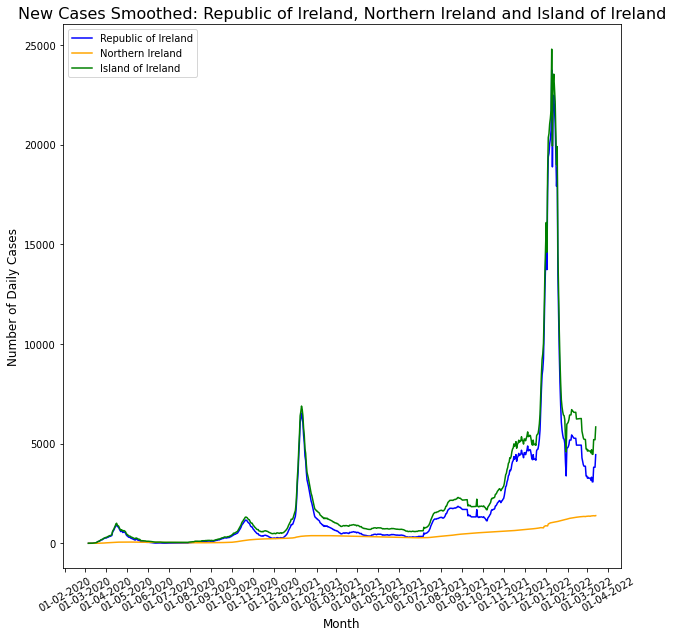

In [25]:
x = df_chart['date']
ax = plt.gca()

formatter = mdates.DateFormatter("%d-%m-%Y")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.MonthLocator()
ax.xaxis.set_major_locator(locator)
y1 = df_chart['new_cases_smoothed_ROI']
plt.plot(x, y1,'-', color='blue')
y2 = df_chart['new_cases_smoothed_NI']
plt.plot(x, y2,'-', color='orange')
y3 = df_chart['ROI_NI']
plt.plot(x, y3,'-', color='green')
plt.title("New Cases Smoothed: Republic of Ireland, Northern Ireland and Island of Ireland", fontsize=16)
plt.legend(['Republic of Ireland','Northern Ireland', 'Island of Ireland'])
plt.xticks(rotation=30)
plt.ylabel("Number of Daily Cases", fontsize=12)
plt.xlabel("Month", fontsize=12)
plt.savefig("NewCases.jpeg")
plt.show()
